In [2]:
print('hello')

hello


In [3]:
# Setup
from web3 import Web3

alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/XtWfn0d5ooMWIVs5AQMxOAb474Km-hs7"
w3 = Web3(Web3.HTTPProvider(alchemy_url))

# Print if web3 is successfully connected
print(w3.is_connected())

# Get the latest block number
latest_block = w3.eth.get_block("latest")
print(latest_block)

True
AttributeDict({'hash': HexBytes('0xc7f5cd7ae3bddd9f726c52e280e74a9de9c0f057070176f2725df2f54d528087'), 'parentHash': HexBytes('0xe3298cbdeb92515a9cd413a8386459687951042526e7574243cfaf92454aed60'), 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'), 'miner': '0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5', 'stateRoot': HexBytes('0x9e656af1e6f893456170158cbc6c70c0cfcf1f0844ebd208a1b7e047033c5251'), 'transactionsRoot': HexBytes('0xd42e1b5c1f7171f95f6b05bfdb5b056087d656eef3c26f17a1fb6417926eba3f'), 'receiptsRoot': HexBytes('0xe81da67ae03ba9a6c09095dcf0bca68cd856e90944a1975ca88ddf83e9c3dda6'), 'logsBloom': HexBytes('0x1169fc67482c45df74d627bb82aaa7c5db18babbee2587125c134bb0bebc7db2678ccd11eae981cf6b98271b3b9e9fdfd337bd789ce4edf4449d3e275dfc45f0de84be8c05ee18befd5b7d98b3f112741a69fbff72d7ffb93e5c0047a26de4d55fc3f1479e7ee3baae8bd9a3b1aeefa23683ac6aaf9d044f1f65ff76215f56517e27af79182ca23ced717f32e1afd9c3569093f163afeeffcdf289dee5f32ebadff4773c2bb8793

In [4]:
# 📦 Cell 2: Get Uniswap V2 Pair for WBTC/USDC
UNISWAP_FACTORY = "0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f"
factory_abi = [{
    "constant": True,
    "inputs": [{"name": "tokenA", "type": "address"}, {"name": "tokenB", "type": "address"}],
    "name": "getPair",
    "outputs": [{"name": "pair", "type": "address"}],
    "payable": False,
    "stateMutability": "view",
    "type": "function"
}]

factory = w3.eth.contract(address=UNISWAP_FACTORY, abi=factory_abi)

WBTC = "0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599"
USDC = "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48"

pair_address = factory.functions.getPair(WBTC, USDC).call()
print("Uniswap V2 WBTC/USDC pair:", pair_address)


Uniswap V2 WBTC/USDC pair: 0x004375Dff511095CC5A197A54140a24eFEF3A416


In [5]:
# # 📦 Cell 3: Get past swap logs (small block window to avoid 400 error)
# from_block = 19800000
# to_block = 19801000

# swap_topic = w3.keccak(text="Swap(address,uint256,uint256,uint256,uint256,address)").hex()

# logs = w3.eth.get_logs({
#     "fromBlock": from_block,
#     "toBlock": to_block,
#     "address": pair_address,
#     "topics": [swap_topic]
# })

# print(f"Found {len(logs)} swap logs")


In [6]:
# import requests
# import json

# # Historical Token Prices (POST /:apiKey/tokens/historical)
# response = requests.post(
#   "https://api.g.alchemy.com/prices/v1/docs-demo/tokens/historical",
#   headers={},
#   json={
#     "network": "eth-mainnet",
#     "address": "0xE0f63A424a4439cBE457D80E4f4b51aD25b2c56C",
#     "startTime": "2024-06-20T00:00:00Z",
#     "endTime": "2024-06-26T23:59:59Z",
#     "interval": "5m"
#   },
# )

# print(response.json())

In [7]:
import requests
import json

api_key = "XtWfn0d5ooMWIVs5AQMxOAb474Km-hs7"
url = f"https://api.g.alchemy.com/prices/v1/{api_key}/tokens/historical"

payload = {
    "network": "eth-mainnet",
    "address": "0xE0f63A424a4439cBE457D80E4f4b51aD25b2c56C",
    "startTime": "2024-06-24T00:00:00Z",
    "endTime": "2024-06-26T23:59:59Z",
    "interval": "5m"
}

response = requests.post(url, json=payload)
print("Status:", response.status_code)
print("Response Text:", response.text)


Status: 200
Response Text: {"network":"eth-mainnet","address":"0xE0f63A424a4439cBE457D80E4f4b51aD25b2c56C","currency":"usd","data":[{"value":"0.0102622374","timestamp":"2024-06-24T00:00:16Z"},{"value":"0.0102650246","timestamp":"2024-06-24T00:03:20Z"},{"value":"0.0102674979","timestamp":"2024-06-24T00:10:21Z"},{"value":"0.0102707984","timestamp":"2024-06-24T00:15:15Z"},{"value":"0.0102679782","timestamp":"2024-06-24T00:18:46Z"},{"value":"0.0103879618","timestamp":"2024-06-24T00:25:03Z"},{"value":"0.0103817436","timestamp":"2024-06-24T00:30:21Z"},{"value":"0.010362031","timestamp":"2024-06-24T00:34:47Z"},{"value":"0.0104056617","timestamp":"2024-06-24T00:39:41Z"},{"value":"0.0103786659","timestamp":"2024-06-24T00:44:44Z"},{"value":"0.0103720909","timestamp":"2024-06-24T00:49:49Z"},{"value":"0.0103785454","timestamp":"2024-06-24T00:54:55Z"},{"value":"0.0105514796","timestamp":"2024-06-24T00:59:31Z"},{"value":"0.0105372686","timestamp":"2024-06-24T01:05:14Z"},{"value":"0.0105158722","time

In [8]:
import pandas as pd

# Extract data safely
response_json = response.json()
raw_data = response_json.get("data", [])

# Build dataframe
df = pd.DataFrame([
    {
        "timestamp": entry["timestamp"],
        "price": float(entry["value"])
    }
    for entry in raw_data
])

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Show preview
df.head()


,price
timestamp,
2024-06-24 00:00:16+00:00,0.010262
2024-06-24 00:03:20+00:00,0.010265
2024-06-24 00:10:21+00:00,0.010267
2024-06-24 00:15:15+00:00,0.010271
2024-06-24 00:18:46+00:00,0.010268


In [9]:
df.shape

(861, 1)

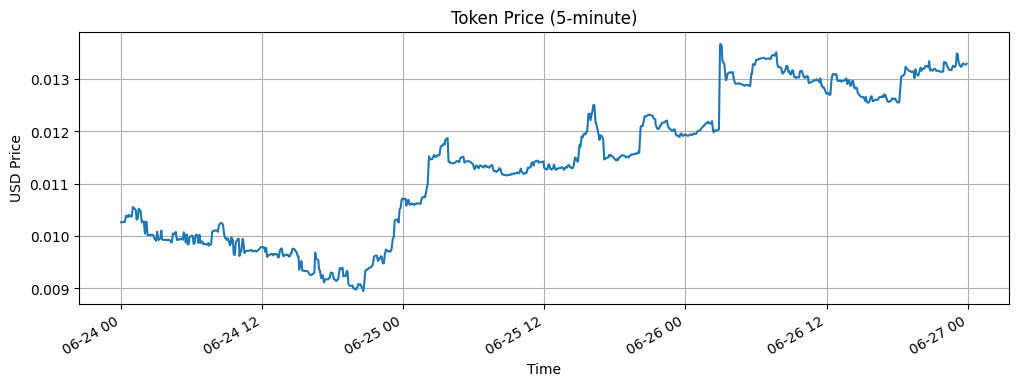

In [10]:
import matplotlib.pyplot as plt

df["price"].plot(figsize=(12, 4), title="Token Price (5-minute)")
plt.ylabel("USD Price")
plt.xlabel("Time")
plt.grid(True)
plt.show()
